In [5]:
import itertools
import os
import random
from abc import ABCMeta, abstractmethod
from contextlib import redirect_stdout
from sys import stderr
import matplotlib.pyplot as plt

from pycocotools.coco import COCO
from skimage.io import imread

DATA_DIR = "/home/users/khu/src/abyss/deep-learning/data"

# Coco data format

In [6]:
from abyss_deep_learning.datasets.coco import ImageClassificationDataset
from abyss_deep_learning.datasets.translators import AnnotationTranslator

# Test COCO Realisations

## Data type: Classification, Task: Classification

In [11]:
class BasicCsvCaptions(AnnotationTranslator):
    '''base class to transform annotations'''
    def __init__(self):
        pass
    def filter(self, annotation):
        '''Whether or not to use a annotation'''
        return 'caption' in annotation
    def translate(self, annotation):
        '''Transform the annotation in to a list of captions'''
        return annotation['caption'].split(',')

ds = ImageClassificationDataset(
    os.path.join(DATA_DIR, "coco-caption.json"),
    image_dir=DATA_DIR,
    cached=False, translator=BasicCsvCaptions())
# ds.caption_map

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


sample: (768, 1196, 3) {'masrur', 'lash', 'rishi', 'nasir', 'paper', 'masood'}
generated:
(768, 1196, 3) {'masrur', 'lash', 'rishi', 'nasir', 'paper', 'masood'}


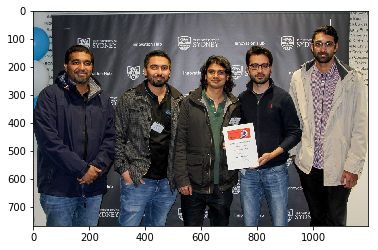

In [12]:
image, caption = ds.sample()
print("sample:", image.shape, caption)
print("generated:")
for image, label in ds.generator(endless=False):
    print(image.shape, label)
    plt.figure()
    plt.imshow(image)
    break

## Data type: Object detection, Task: Classification

In [13]:
from skimage.transform import resize

def image_transformer(image):
    return resize(image, (299, 299), mode='constant', cval=0)

class CaptionsFromCatId(AnnotationTranslator):
    '''base class to transform annotations'''
    def __init__(self):
        pass
    def filter(self, annotation):
        '''Whether or not to use a annotation'''
        return 'segmentation' in annotation
    def translate(self, annotation):
        '''Transform the annotation in to a list of captions'''
        return [annotation['category_id']]

ds = ImageClassificationDataset(
    os.path.join(DATA_DIR, "coco-segmentation.json"),
    image_dir=DATA_DIR,
    cached=True,
    preprocess_data=image_transformer,
    translator=CaptionsFromCatId()
)


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
/home/users/khu/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


sample: (299, 299, 3) {1, 2, 3, 4, 5, 6}
generated:
(299, 299, 3) {1, 2, 3, 4, 5, 6}


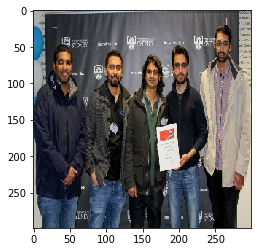

In [14]:
# %%timeit -n1 -r3
'''Check difference in timing when setting cached True/False'''

image, caption = ds.sample()
print("sample:", image.shape, caption)
print("generated:")
for image, label in ds.generator(endless=False):
    print(image.shape, label)
    plt.figure()
    plt.imshow(image)
    break

In [15]:
ds.print_class_stats()

======== class stats ========
data count per class:
  {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1}
class weights:
  {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0}
trivial result accuracy:
  1.00 or 0.00
